In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import random
from scipy.spatial.distance import pdist, squareform
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
from scipy.integrate import solve_ivp
from datetime import datetime
from tqdm import tqdm
from time import time

%matplotlib inline
#change directory to save output here
directory = r"D:\Users\Nick\Desktop\Everything\Uni\Honours Project\Plots\MiscExamples/"
plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(directory))

C:\Users\nickb\AppData\Local\Temp/ipykernel_14428/1744188839.py:19: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(directory))


In [39]:
def embedding_delay(y,m=3,delay=2):
    """Returns the trajectory matrix X from the 1-D array y, with delay=delay and embedding dimension=m"""
    N=y.shape[0]
    W=N-(m-1)*delay
    X=np.empty((W,m))
    for m_i in range(m):
        X[:,m_i]=y[m_i*delay:m_i*delay+W].copy()
    return(X)


def fun(t, A1=1, A2=1,f=1, w1=1/5, w2=5/100):
    """Returns a sin wave.
        a, float, amplitude
        f, float, frequency in Hz
        c, float, horizontal shift (or phase shift)
        d, float, vertical shift
    """
    b = 2*np.pi*f # angular frequency
    result=np.sin((1/5)*t)*np.cos((8/25)*t)
    
    return result


def logistic(t,x0):
    i=0
    vals = np.array([])
    i_vals = np.array([])
    for x in t:
        x1 = 3.8*x0*(1-x0) 
        vals=np.append(vals,x1)
        i_vals=np.append(i_vals,0.01*i)
        x0=x1
        i+=1
    
    vals=vals+i_vals
    return(vals)

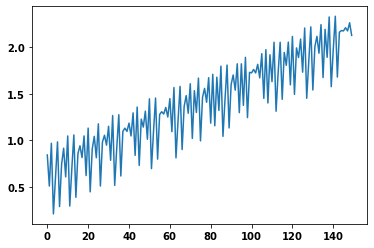

In [40]:
t0,tf = 0,500
h=1

t_vec=np.arange(t0,tf,h)

noise = np.random.normal(0,1,len(t_vec))

periodic = fun(t_vec)



t0,tf = 0,150
h=1
t_vec=np.arange(t0,tf,h)

drift = logistic(t_vec,0.333)

plt.plot(drift)

plt.show()

In [43]:
m ,delay = 1,1

noisedelay = embedding_delay(noise,m,delay)


eps_noise = 0.15

norm = "euclidean"

Dm_noise = pdist(noisedelay, metric=norm)
Rij_noise = squareform(Dm_noise < eps_noise)
np.fill_diagonal(Rij_noise,1)

m,delay = 3,1
periodicdelay = embedding_delay(periodic,m,delay)
eps_periodic = 0.4

Dm_periodic = pdist(periodicdelay, metric=norm)
Rij_periodic = squareform(Dm_periodic < eps_periodic)
np.fill_diagonal(Rij_periodic,1)
                          

m,delay = 1,1
eps_drift = 0.15
driftdelay = embedding_delay(drift,m,delay)
Dm_drift = pdist(driftdelay,metric=norm)
Rij_drift = squareform(Dm_drift < eps_drift)
    
                

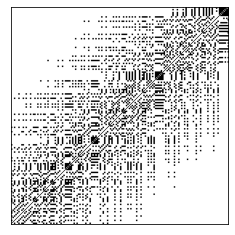

In [45]:
plt.imshow(Rij_drift, origin="lower", cmap="binary")
plt.xticks(())
plt.yticks(())


plt.plot(t_vec,t_vec,color='k',linewidth=0.6)
plt.savefig("RPdrift.pdf",format="pdf",bbox_inches="tight")
plt.show()


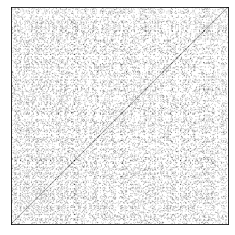

In [221]:
plt.imshow(Rij_noise, origin="lower", cmap="binary")
plt.xticks(())
plt.yticks(())
plt.savefig("RPnoise.pdf",format="pdf",bbox_inches="tight")
plt.show()

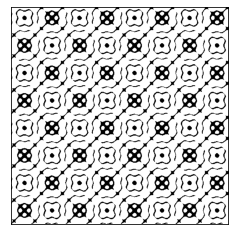

In [30]:
plt.imshow(Rij_periodic, origin="lower", cmap="binary")
plt.xticks(())
plt.yticks(())
plt.savefig("RPperiodic.pdf",format="pdf",bbox_inches="tight")
plt.show()


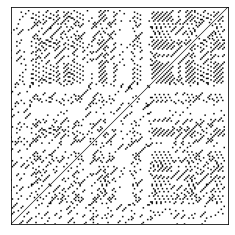

In [468]:
plt.imshow(Rij_drift, origin="lower", cmap="binary")
plt.xticks(())
plt.yticks(())

plt.ylim([0,148])
plt.xlim([0,148])
plt.plot(t_vec,t_vec,color='k',linewidth=0.6)
plt.savefig("RPdrift.pdf",format="pdf",bbox_inches="tight")
plt.show()
